In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where

X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

for class_value in range(3):
	# select indices of points with the class label
	row_ix = where(y == class_value)
	# scatter plot for points with a different color
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.show()

In [ ]:
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot


def create_dataset():
	X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)
	y = to_categorical(y)
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

def evaluate_model(n_nodes, trainX, trainy, testX, testy):
	# configure the model based on the data
	n_input, n_classes = trainX.shape[1], testy.shape[1]
	# define model
	model = Sequential()
	model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(n_classes, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model on train set
	history = model.fit(trainX, trainy, epochs=100, verbose=0)
	# evaluate model on test set
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	return history, test_acc


trainX, trainy, testX, testy = create_dataset()

num_nodes = [1, 2, 3, 4, 5, 6, 7]
for n_nodes in num_nodes:
	# evaluate model with a given number of nodes
	history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)
	# summarize final test set accuracy
	print('nodes=%d: %.3f' % (n_nodes, result))
	# plot learning curve
	pyplot.plot(history.history['loss'], label=str(n_nodes))

pyplot.legend()
pyplot.show()

layers=1: 1.000
layers=2: 1.000
layers=3: 1.000
layers=4: 0.998
layers=5: 0.634


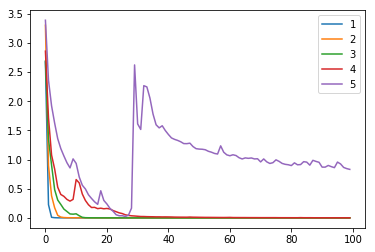

In [6]:
from sklearn.datasets import make_blobs
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

def create_dataset():
	X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)
	y = to_categorical(y)
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy


def evaluate_model(n_layers, trainX, trainy, testX, testy):
	n_input, n_classes = trainX.shape[1], testy.shape[1]
	model = Sequential()
	model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	for _ in range(1, n_layers):
		model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(n_classes, activation='softmax'))
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	history = model.fit(trainX, trainy, epochs=100, verbose=0)
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	return history, test_acc


trainX, trainy, testX, testy = create_dataset()
all_history = list()
num_layers = [1, 2, 3, 4, 5]
for n_layers in num_layers:
	history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)
	print('layers=%d: %.3f' % (n_layers, result))
	pyplot.plot(history.history['loss'], label=str(n_layers))
pyplot.legend()
pyplot.show()